In [1]:
from keras.datasets import mnist

In [2]:
#Now you understand that the input images are stored in Numpy tensors, which are
#here formatted as float32 tensors of shape (60000, 784) (training data) and (10000,
#784) (test data), respectively.
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_images)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from keras import models
from keras import layers
#Now you understand that this network consists of a chain of two Dense layers, that each layer applies a few simple tensor operations to the input data, and that these operations involve weight tensors. Weight tensors, which are attributes of the layers, are where the knowledge of the network persists.
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
#Now you understand that categorical_crossentropy is the loss function that’s used as a feedback signal for learning the weight tensors, and which the training phase will attempt to minimize. You also know that this reduction of the loss happens via minibatch stochastic gradient descent. The exact rules governing a specific use of gradient descent are defined by the rmsprop optimizer passed as the first argument. 
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [12]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
#Finally, this was the training loop:
network.fit(train_images, train_labels, epochs=7, batch_size=128)

Epoch 1/7
469/469 [==============================] - 8s 17ms/step - loss: 0.2532 - accuracy: 0.9265
Epoch 2/7
469/469 [==============================] - 10s 21ms/step - loss: 0.1040 - accuracy: 0.9692
Epoch 3/7
469/469 [==============================] - 7s 14ms/step - loss: 0.0684 - accuracy: 0.9792
Epoch 4/7
469/469 [==============================] - 5s 11ms/step - loss: 0.0494 - accuracy: 0.9848
Epoch 5/7
469/469 [==============================] - 6s 12ms/step - loss: 0.0372 - accuracy: 0.9887
Epoch 6/7
469/469 [==============================] - 5s 11ms/step - loss: 0.0283 - accuracy: 0.9918
Epoch 7/7
469/469 [==============================] - 5s 11ms/step - loss: 0.0218 - accuracy: 0.9940


In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0698 - accuracy: 0.9797
test_acc: 0.9797000288963318


In [15]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [16]:
print(train_images.ndim)

3


In [17]:
print(train_images.shape)

(60000, 28, 28)


In [18]:
print(train_images.dtype)

uint8


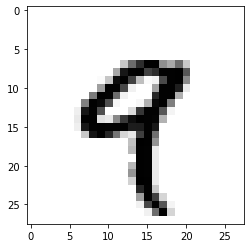

In [19]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [20]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)
